In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [72]:
# computational constants
time_step = 0.001
time_period = 100

# time array
t = np.arange(0, time_period, time_step)

# revolution lines
upper_line = np.zeros(int(time_period/time_step)) + np.pi
lower_line = np.zeros(int(time_period/time_step)) - np.pi

In [58]:
# equations of motion
def doublePend(y, t):
    theta1, theta2, p1, p2 = y
    dydt = [(p2*np.cos(theta1-theta2)-p1)/((np.cos(theta1-theta2))**2-2),
            (p1*np.cos(theta1-theta2)-2*p2)/((np.cos(theta1-theta2))**2-2),
            (p1*np.cos(theta1-theta2)-p1)*(p1*np.cos(theta1-theta2)-2*p2)*np.sin(theta2-theta1)/((np.cos(theta1-theta2))**2-2)-2*np.sin(theta1),
            (p1*np.cos(theta1-theta2)-p1)*(p1*np.cos(theta1-theta2)-2*p2)*np.sin(theta1-theta2)/((np.cos(theta1-theta2))**2-2)-np.sin(theta2)]
    return dydt

Test Case

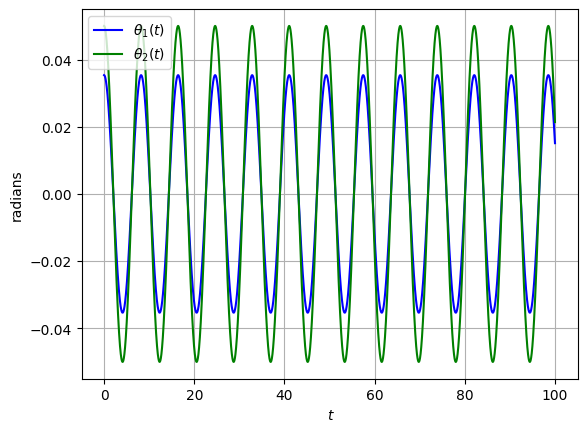

In [98]:
# initial conditions
init_angle = 0.05
y_test = [init_angle/np.sqrt(2), init_angle, 0, 0]

# run solution
test_sol = odeint(doublePend, y_test, t)

# plot solution
plt.plot(t, test_sol[:, 0], 'b', label="$\\theta_1(t)$")
plt.plot(t, test_sol[:, 1], 'g', label="$\\theta_2(t)$")
plt.legend(loc='best')
plt.xlabel("$t$")
plt.ylabel('radians')
plt.grid()
plt.show()

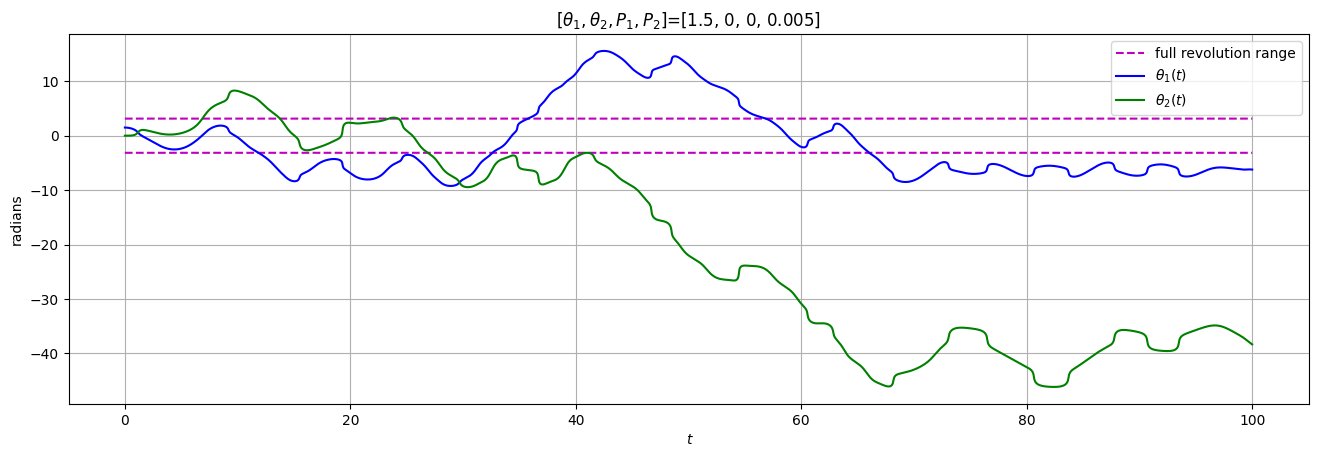

In [109]:
# initial conditions
y1 = [1.5, 0, 0, 0.005]

# run solution
sol1 = odeint(doublePend, y1, t)

# plot solution
plt.figure().set_figwidth(16)
plt.plot(t, upper_line, 'm', linestyle = 'dashed', label = 'full revolution range')
plt.plot(t, lower_line, 'm', linestyle = 'dashed')
plt.plot(t, sol1[:, 0], 'b', label="$\\theta_1(t)$")
plt.plot(t, sol1[:, 1], 'g', label="$\\theta_2(t)$")
plt.legend(loc='best')
plt.xlabel("$t$")
plt.ylabel('radians')
plt.title("$\\left[\\theta_1,\\theta_2,P_1,P_2\\right]$={}".format(y1))
plt.grid()
plt.show()

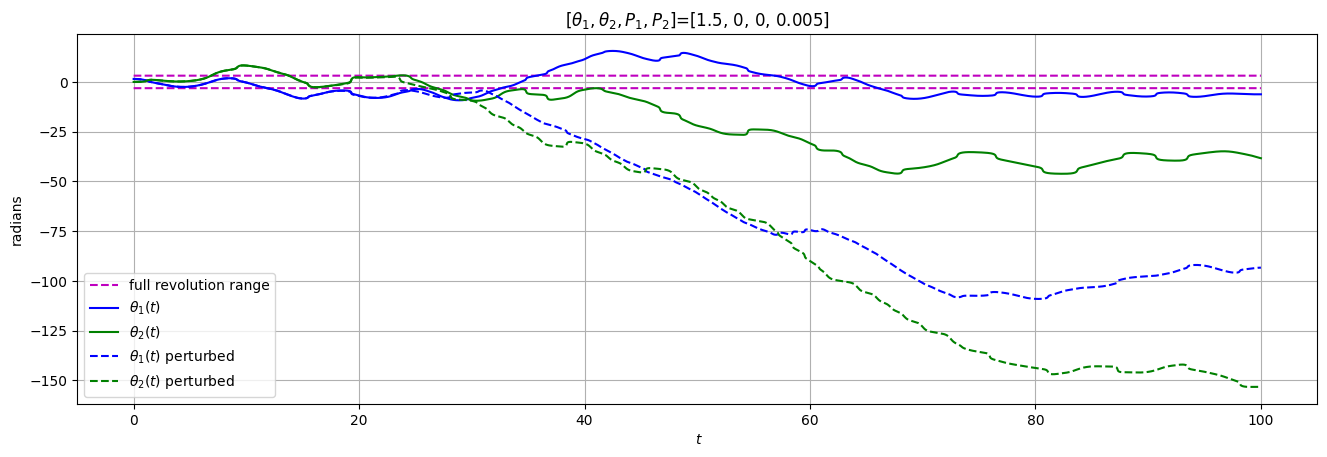

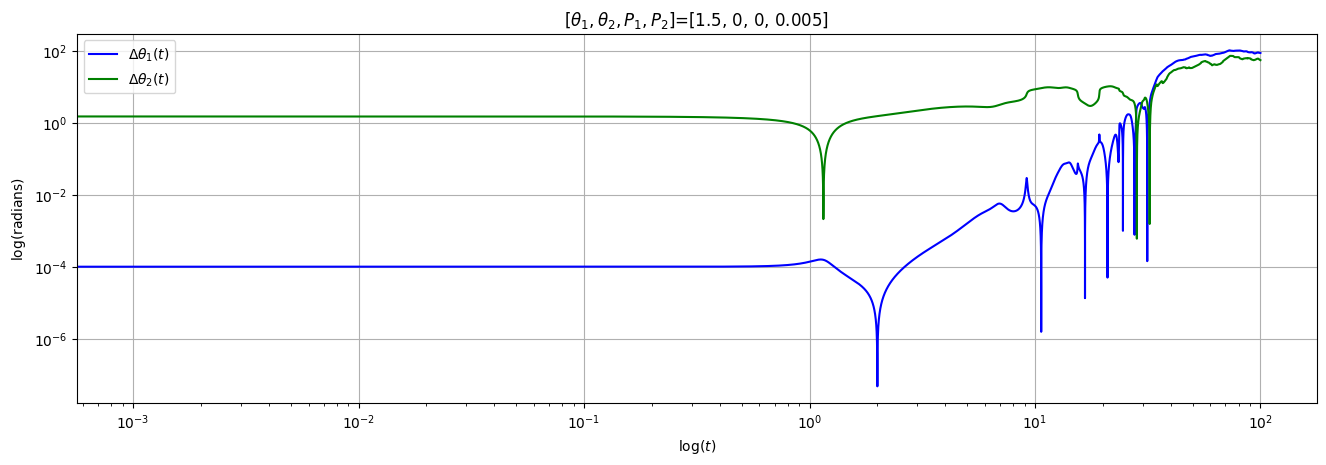

In [125]:
# initial conditions
y1 = [1.5, 0, 0, 0.005]
y2 = y1.copy()
y2[0] += 0.0001

# run solution
sol1 = odeint(doublePend, y1, t)
sol2 = odeint(doublePend, y2, t)

# plot solution
plt.figure().set_figwidth(16)
plt.plot(t, upper_line, 'm', linestyle = 'dashed', label = 'full revolution range')
plt.plot(t, lower_line, 'm', linestyle = 'dashed')
plt.plot(t, sol1[:, 0], 'b', label="$\\theta_1(t)$")
plt.plot(t, sol1[:, 1], 'g', label="$\\theta_2(t)$")
plt.plot(t, sol2[:, 0], 'b', linestyle = 'dashed', label="$\\theta_1(t)$ perturbed")
plt.plot(t, sol2[:, 1], 'g', linestyle = 'dashed', label="$\\theta_2(t)$ perturbed")
plt.legend(loc='best')
plt.xlabel("$\ t$")
plt.ylabel('radians')
plt.title("$\\left[\\theta_1,\\theta_2,P_1,P_2\\right]$={}".format(y1))
plt.grid()
plt.show()

# plot log graph
plt.figure().set_figwidth(16)
plt.loglog(t, np.abs(sol2[:,0]-sol1[:, 0]), 'b', label="$\\Delta\\theta_1(t)$")
plt.loglog(t, np.abs(sol2[:,0]-sol1[:, 1]), 'g', label="$\\Delta\\theta_2(t)$")
plt.legend(loc='best')
plt.xlabel("$\log(t)$")
plt.ylabel("$\\log(\\mathrm{radians})$")
plt.title("$\\left[\\theta_1,\\theta_2,P_1,P_2\\right]$={}".format(y1))
plt.grid()
plt.show()
